In [22]:
import pandas as pd
from sklearn.utils import resample
import seaborn as sns
import matplotlib.pyplot as plt


In [23]:
train_df = pd.read_csv('data_train.csv')
test_df = pd.read_csv('data_test.csv')

In [25]:
label_col = 'Phân Loại'

# Xác định số mẫu cần lấy (30% số mẫu train)
desired_sample_size = int(0.3 * len(train_df))
print(f"🎯 Số mẫu cần lấy từ test: {desired_sample_size}")

# Tính phân phối nhãn trong tập train
train_distribution = train_df[label_col].value_counts(normalize=True)
print("\n📊 Phân phối nhãn trong tập train:")
print(train_distribution)

# Khởi tạo list lưu mẫu theo phân phối train
resampled_parts = []

# Với mỗi nhãn, lấy mẫu từ test_df sao cho tỉ lệ giống train
for label, proportion in train_distribution.items():
    n_samples = int(round(proportion * desired_sample_size))
        
    class_subset = test_df[test_df[label_col] == label]
    
    # Kiểm tra đủ mẫu không
    if len(class_subset) < n_samples:
        print(f"⚠️ Không đủ mẫu cho nhãn '{label}' trong test_df, chỉ lấy {len(class_subset)} mẫu.")
        n_samples = len(class_subset)

    sampled_class = resample(class_subset, replace=False, n_samples=n_samples, random_state=42)
    resampled_parts.append(sampled_class)

# Gộp và xáo trộn
stratified_sample = pd.concat(resampled_parts, ignore_index=True).sample(frac=1, random_state=42).reset_index(drop=True)

print(f"\n✅ Tổng số mẫu sau resample: {len(stratified_sample)}")

# Kiểm tra phân phối
sample_distribution = stratified_sample[label_col].value_counts(normalize=True)
print("\n📊 Phân phối nhãn sau resample:")
print(sample_distribution)



🎯 Số mẫu cần lấy từ test: 372

📊 Phân phối nhãn trong tập train:
Phân Loại
Di động / Mỏng nhẹ / Ultrabook    0.259051
Thiết kế đồ họa / Multimedia      0.238938
Kỹ thuật / Lập trình              0.216412
Gaming                            0.178600
Văn phòng / Học tập               0.053902
Laptop 2 trong 1 / Cảm ứng        0.053097
Name: proportion, dtype: float64

✅ Tổng số mẫu sau resample: 372

📊 Phân phối nhãn sau resample:
Phân Loại
Di động / Mỏng nhẹ / Ultrabook    0.258065
Thiết kế đồ họa / Multimedia      0.239247
Kỹ thuật / Lập trình              0.217742
Gaming                            0.177419
Văn phòng / Học tập               0.053763
Laptop 2 trong 1 / Cảm ứng        0.053763
Name: proportion, dtype: float64


In [26]:
stratified_sample.to_csv('data_test_final.csv', index=False)


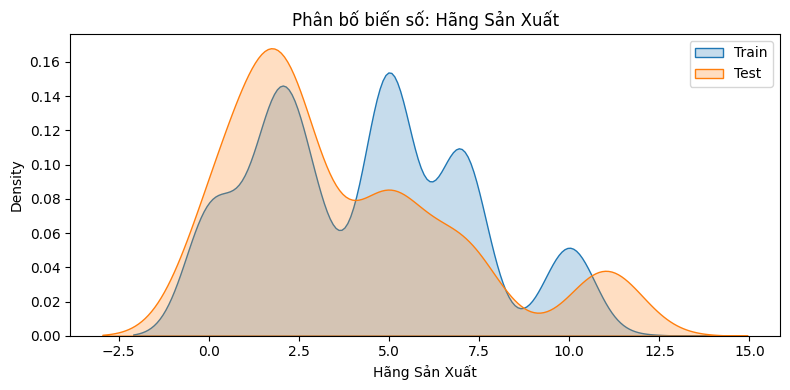

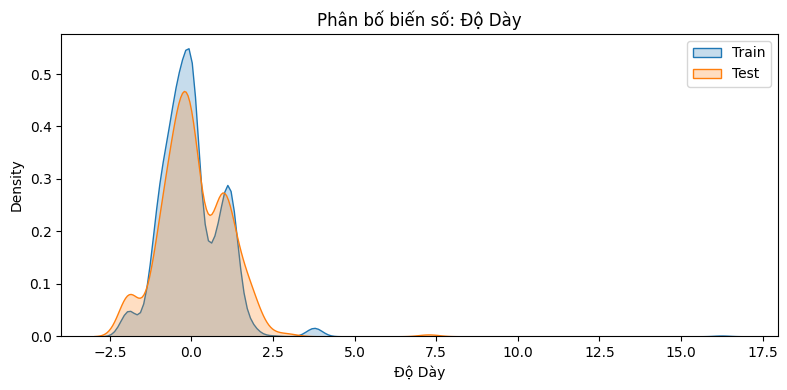

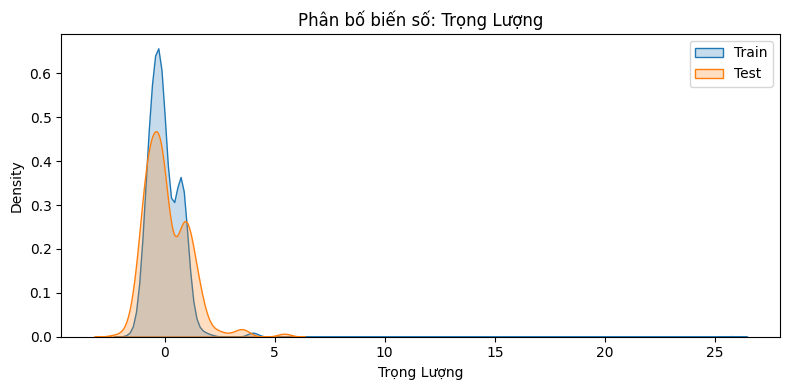

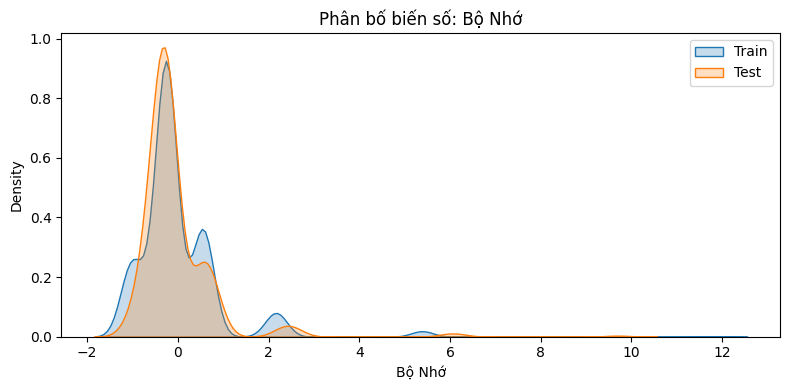

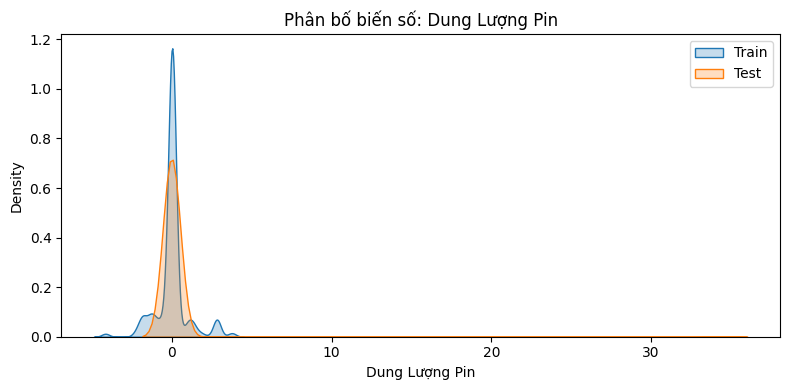

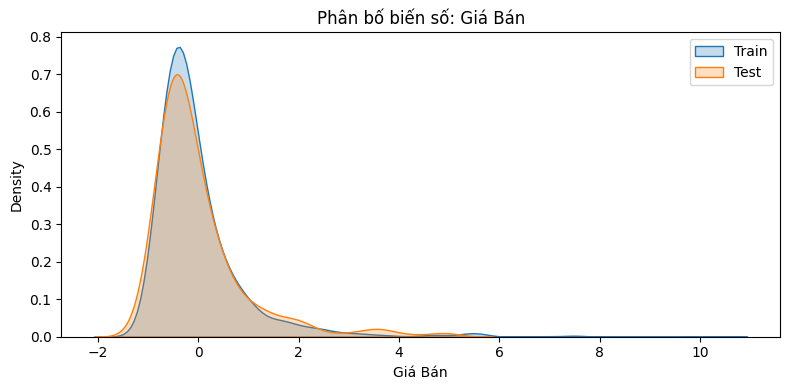

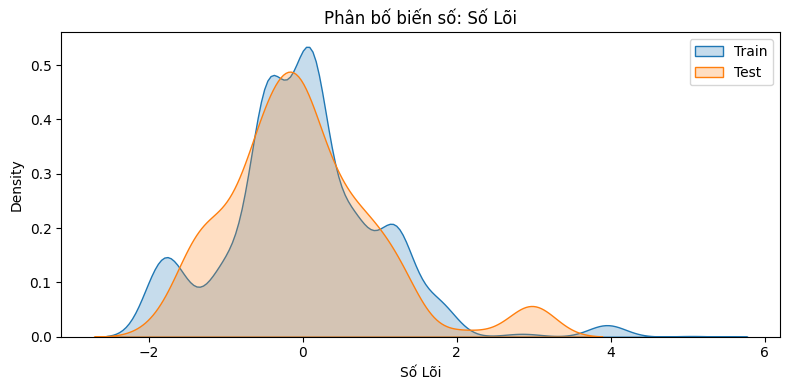

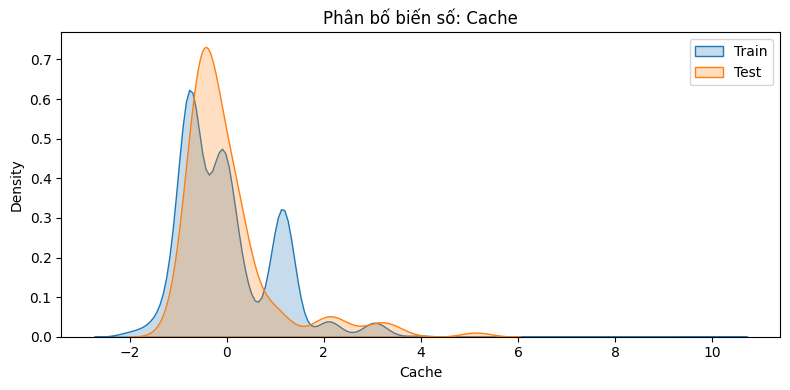

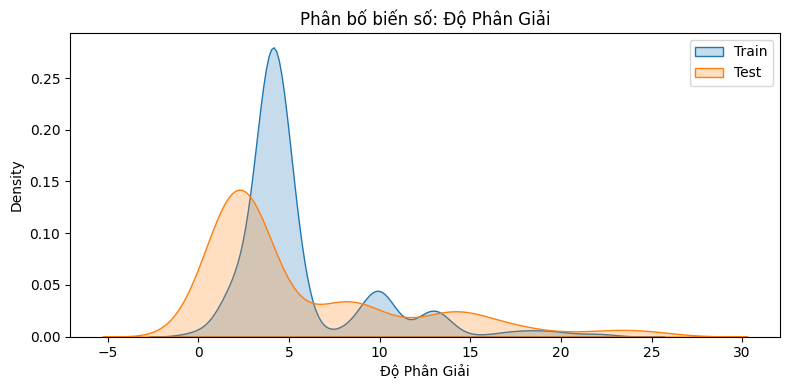

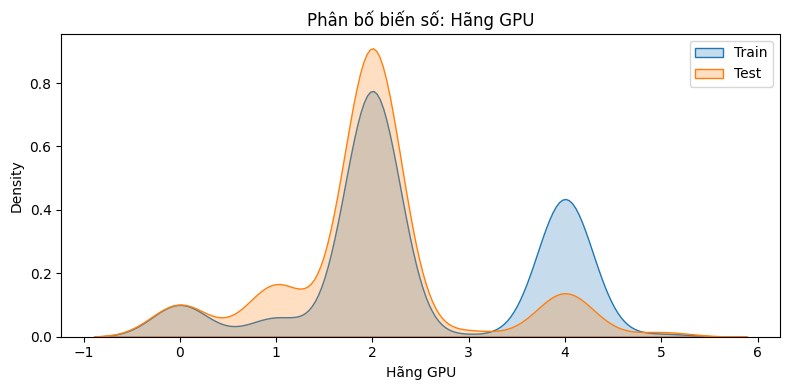

<Figure size 800x400 with 0 Axes>

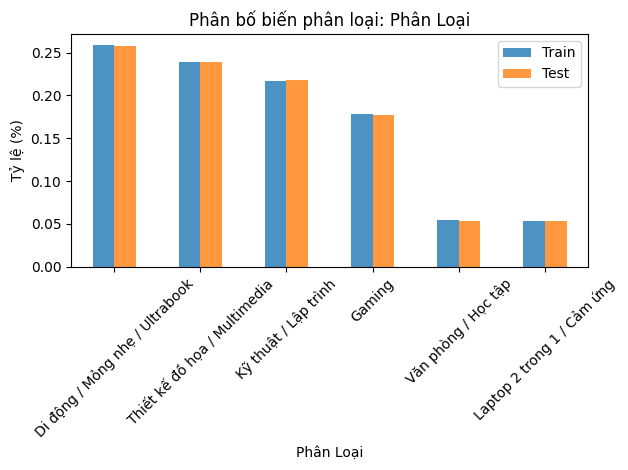

In [29]:
#Biểu diễn sự phân bố dữ liệu các đặc trưng quan trọng của 2 tập train và test

def visualize_distribution(train_df, test_df, target_col=None, max_cat_values=20):
    """
    Hàm trực quan hóa phân bố các đặc trưng giữa tập train và test
    - target_col: cột mục tiêu (nếu có, ví dụ 'muc_dich')
    - max_cat_values: số lượng giá trị phân loại tối đa để hiển thị biểu đồ
    """
    # Biến số
    numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    # Biến danh mục
    categorical_cols = train_df.select_dtypes(include=['object', 'category']).columns.tolist()

    # 1. Biến mục tiêu
    if target_col and target_col in train_df.columns:
        plt.figure(figsize=(7,4))
        sns.countplot(data=train_df, x=target_col, order=train_df[target_col].value_counts().index)
        plt.title('Phân bố mục tiêu (Train)')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        if target_col in test_df.columns:
            plt.figure(figsize=(7,4))
            sns.countplot(data=test_df, x=target_col, order=test_df[target_col].value_counts().index)
            plt.title('Phân bố mục tiêu (Test)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

    # 2. Trực quan hóa biến số
    for col in numerical_cols:
        if col in test_df.columns:
            plt.figure(figsize=(8, 4))
            sns.kdeplot(train_df[col].dropna(), label='Train', fill=True)
            sns.kdeplot(test_df[col].dropna(), label='Test', fill=True)
            plt.title(f'Phân bố biến số: {col}')
            plt.xlabel(col)
            plt.legend()
            plt.tight_layout()
            plt.show()

    # 3. Trực quan hóa biến danh mục
    for col in categorical_cols:
        if col in test_df.columns and train_df[col].nunique() <= max_cat_values:
            plt.figure(figsize=(8, 4))
            train_freq = train_df[col].value_counts(normalize=True)
            test_freq = test_df[col].value_counts(normalize=True)
            compare_df = pd.DataFrame({'Train': train_freq, 'Test': test_freq}).fillna(0)
            compare_df.plot(kind='bar', alpha=0.8)
            plt.title(f'Phân bố biến phân loại: {col}')
            plt.ylabel('Tỷ lệ (%)')
            plt.xticks(rotation=45)
            plt.tight_layout()
            plt.show()

visualize_distribution(train_df, stratified_sample, target_col='muc_dich')